EDA for the Draper Satellite image competition on Kaggle.
I am basically just using differnt techniques from here: https://www.kaggle.com/bkamphaus/draper-satellite-image-chronology/exploratory-image-analysis/comments plus a few other ideas.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline


In [130]:
first = plt.imread("/Users/alexpapiu/Documents/R/Satelite_IMG/train_sm/set4_1.jpeg")
second = plt.imread("/Users/alexpapiu/Documents/R/Satelite_IMG/train_sm/set4_2.jpeg")

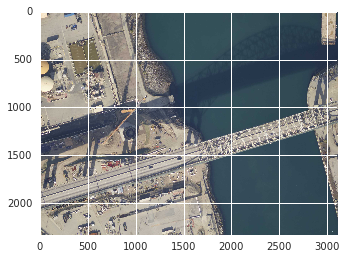

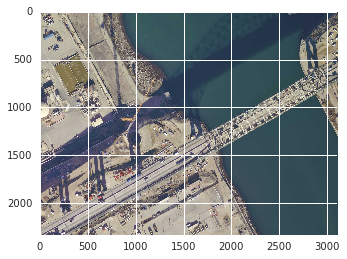

In [131]:
#plt.figure(figsize=(8,8))
plt.imshow(first)
plt.show()
plt.imshow(second)
plt.show()

Let's look at the differences:

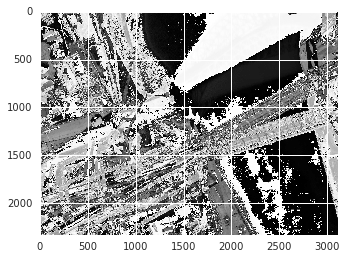

In [132]:
plt.imshow(first[:,:,1] - second[:,:,1])

Let's look at the histograms by colors. First we transform every pixel matrix into a vector.

In [58]:
X = np.reshape(first, (first.shape[0]*first.shape[1], first.shape[2]))

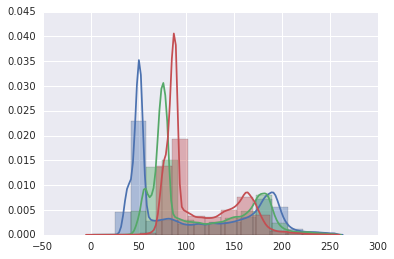

In [68]:
sns.distplot(X[:,0], bins = 15)
sns.distplot(X[:,1], bins = 15)
sns.distplot(X[:,2], bins = 15)

Let's try to visualize by thresholding certain levels of pixel intensity:

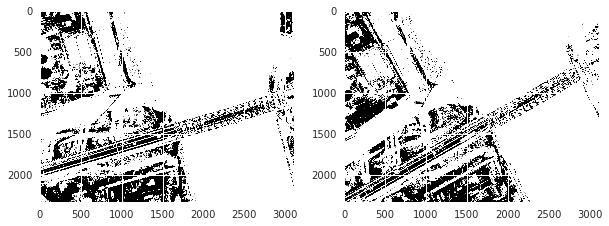

In [98]:
plt.figure(figsize = (10,10))
tresh = 180
plt.subplot(121)
plt.imshow(first[:,:,0] > tresh)
plt.subplot(122)
plt.imshow(second[:,:,0] > tresh)


#first[:,:,0] > 200 - this just gives True or False and then you look at the image.

Tresholding with an interval, say [180,200].

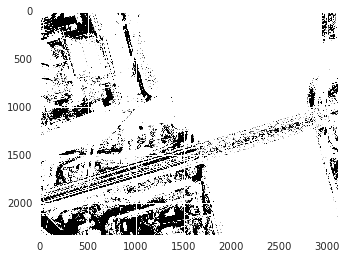

In [116]:
x = first[:,:,0] > 180
y = first[:,:,0] < 200
x*y
plt.imshow(x*y)

Let's apply the sobol filter. This is a convolution of the 

In [117]:
from skimage.filters import sobel

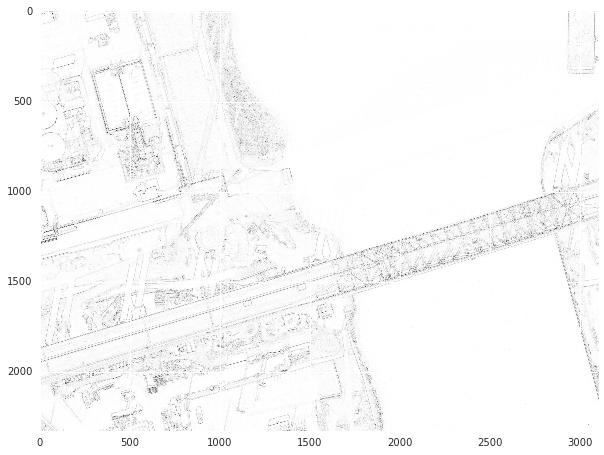

In [134]:
plt.figure(figsize = (10,10))
plt.imshow(sobel(first[:,:,0]))

In [141]:
img = np.array([[1,2,3,4],
               [4,5,6,6],
               [5,6,7,12]])

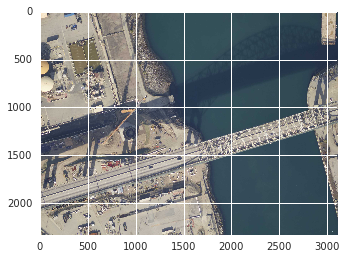

In [145]:
plt.imshow(first)
from scipy import ndimage

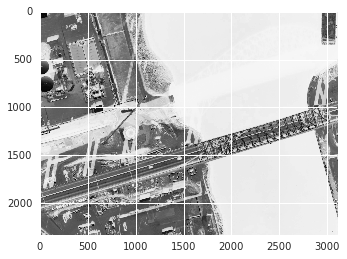

In [172]:
conv_image = ndimage.convolve(first[:,:,0], k_2, mode="constant")
plt.imshow(conv_image)

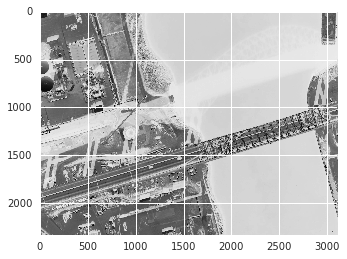

In [157]:
plt.imshow(first[:,:,1])

In [238]:
a = np.array([[1, 2, 0, 0],
              [5, 3, 0, 4],
              [0, 0, 0, 7],
              [9, 3, 0, 0]])
k = np.array([[0,-1,0],
              [0,0,0],
              [0,1,0]])
k_2 = np.array([[1/9,1/9,1/9],
              [1/9,1/9,1/9],
              [1/9,1/9,1/9]])

In [239]:
dog = plt.imread("/Users/alexpapiu/Downloads/Broadway_tower_grayscale.jpg")

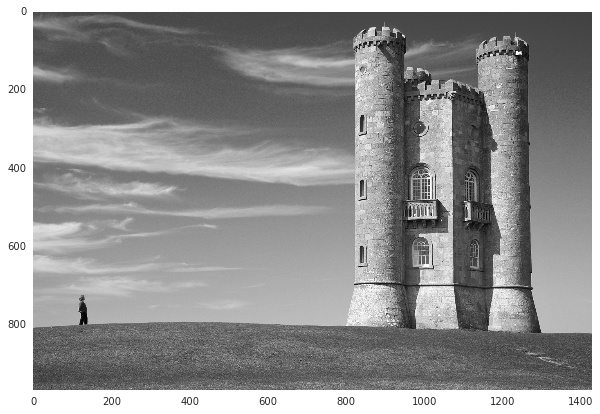

In [179]:
plt.figure(figsize= (10,10))
plt.imshow(dog)
plt.grid(False)

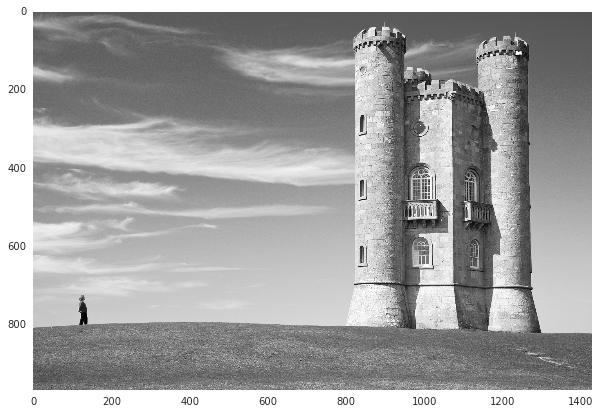

In [240]:
plt.figure(figsize= (10,10))
plt.imshow(-dog.mean(2))
plt.grid(False)

In [193]:
grey_scale = dog.mean(2)

In [221]:
k = np.array([[1/9,1/9,1/9],
              [1/9,1/9,1/9],
              [1/9,1/9,1/9]])
k_1 = np.array([[0,-1,0],
                [-1,0,1],
                [0,1,0]])
k_2 =np.array([[-1,-1,-1],
               [-1,10,-1],
               [-1,-1,-1]])

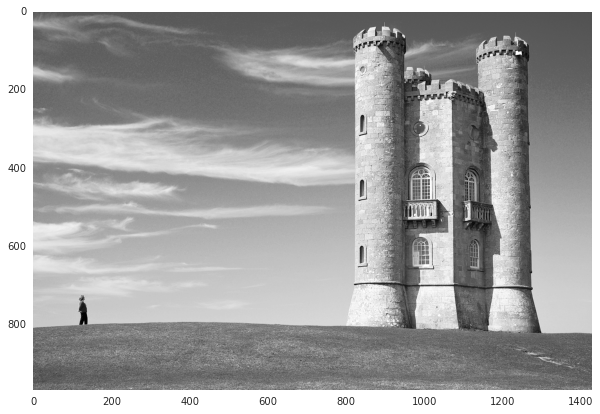

In [242]:
plt.figure(figsize= (10,10))
plt.imshow(-ndimage.convolve(grey_scale, k_2))
plt.grid(False)

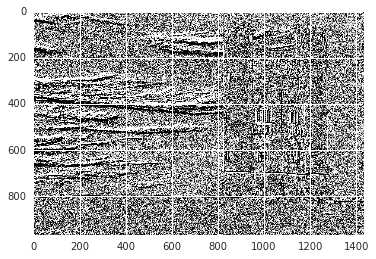

In [235]:
plt.imshow(ndimage.convolve(grey_scale, k_1) > 0)

In [237]:
ndimage.convolve(grey_scale, k_1)

array([[ -4.,   0.,   4., ...,   4.,   2.,  -1.],
       [ -8.,  -5.,  -8., ...,   2.,  -2.,  -3.],
       [ -1.,  -7.,   2., ...,  -1.,  -2.,   2.],
       ..., 
       [ 73.,  50., -61., ..., -66., -14., -58.],
       [ 18., -18., -31., ...,  27.,  23., -42.],
       [-11.,  -2.,  -2., ...,  99.,  26.,  20.]])